## Tratamento de dados

### Análise dos dados

In [349]:
import pandas as pd

df = pd.read_excel('titanic-parsed-numbers.xlsx')
# conversão dos números corretamente
# https://acadespm-my.sharepoint.com/:x:/g/personal/guilherme_casagrande_acad_espm_br/EYaSZ2RzYF5EtqdNTR6VWs0Bmy04roGszQr5y3eyf3RnCw?e=aCfUVD

print(df.dtypes)
df

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.25
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,712833.00
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7925.00
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.10
4,0,3,Mr. William Henry Allen,male,35.0,0,0,43959.00
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00


- Checar nulos

In [350]:
df.apply(lambda x : sum(x.isnull()), axis=0)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

- Contagem de valores por cada variável

In [351]:
cols = ['Survived', 'Pclass', 'Sex']

for c in cols:
        print(df[c].value_counts())

Survived
0    545
1    342
Name: count, dtype: int64
Pclass
3    487
1    216
2    184
Name: count, dtype: int64
Sex
male      573
female    314
Name: count, dtype: int64


### Preparação dos dados

In [352]:
from sklearn.preprocessing import LabelEncoder

data = df.iloc[:,1:]
data = data.drop(axis=1, columns=['Name'])

target = df.iloc[:,0]

le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

print(data)
print(target)

     Pclass  Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard  \
0         3    1  22.0                        1                        0   
1         1    0  38.0                        1                        0   
2         3    0  26.0                        0                        0   
3         1    0  35.0                        1                        0   
4         3    1  35.0                        0                        0   
..      ...  ...   ...                      ...                      ...   
882       2    1  27.0                        0                        0   
883       1    0  19.0                        0                        0   
884       3    0   7.0                        1                        2   
885       1    1  26.0                        0                        0   
886       3    1  32.0                        0                        0   

          Fare  
0         7.25  
1    712833.00  
2      7925.00  
3        53.10  
4 

In [353]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=777)

## Treino dos modelos

Importar funções de teste

In [354]:
from sklearn.metrics import accuracy_score, confusion_matrix

### Modelo de Árvore de Decisão

O modelo de árvore de decisão cria a partir dos dados uma estrutura de árvore para classificar dos dados nas categorias possíveis das variáveis alvo

In [355]:
from sklearn.ensemble import RandomForestClassifier

d_range = range(3,8)
acc_by_d_test = {}
acc_by_d_train = {}
conf_matrix_by_d_test = {}
conf_matrix_by_d_train = {}
acc_list_test = []
acc_list_train = []

for d in d_range:
    clfr = RandomForestClassifier(n_estimators=1000, max_depth=d)
    clfr.fit(x_train, y_train)

    predict_train = clfr.predict(x_train)
    acc_by_d_train[d] = accuracy_score(y_train, predict_train)
    conf_matrix_by_d_train[d] = confusion_matrix(y_train, predict_train)
    acc_list_train.append(acc_by_d_train[d])

    predict_test = clfr.predict(x_test)
    acc_by_d_test[d] = accuracy_score(y_test, predict_test)
    conf_matrix_by_d_test[d] = confusion_matrix(y_test, predict_test)
    acc_list_test.append(acc_by_d_test[d])

#### Performance com a base de treino

##### Acurácia em relação a Profundidade

Text(0.5, 1.0, 'Acurácia vs valor de profundidade')

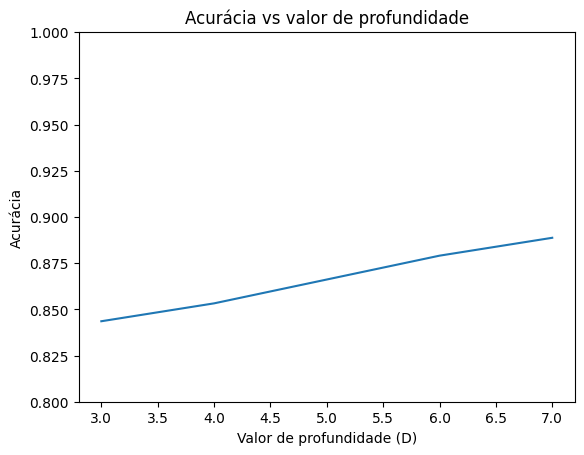

In [356]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(d_range, acc_list_train)
plt.xlabel("Valor de profundidade (D)")
plt.ylabel("Acurácia")
plt.ylim(0.8,1)
plt.title('Acurácia vs valor de profundidade')

In [357]:
for d in conf_matrix_by_d_train:
    print(d)
    print(conf_matrix_by_d_train[d])

3
[[356  30]
 [ 67 167]]
4
[[359  27]
 [ 64 170]]
5
[[361  25]
 [ 58 176]]
6
[[366  20]
 [ 55 179]]
7
[[367  19]
 [ 50 184]]


#### Performance com a base de teste

##### Acurácia em relação a Profundidade

Text(0.5, 1.0, 'Acurácia vs valor de profundidade')

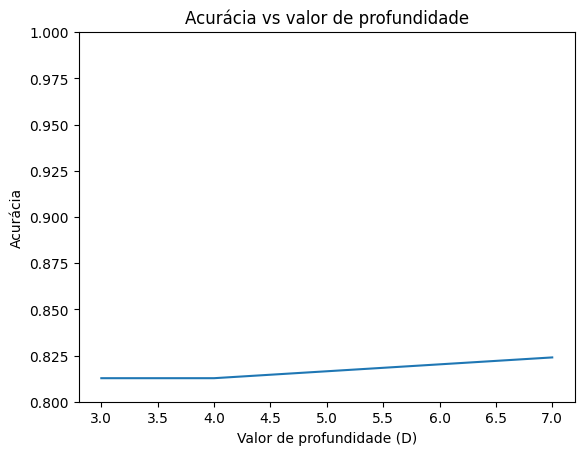

In [358]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(d_range, acc_list_test)
plt.xlabel("Valor de profundidade (D)")
plt.ylabel("Acurácia")
plt.ylim(0.8,1)
plt.title('Acurácia vs valor de profundidade')

In [359]:
for d in conf_matrix_by_d_test:
    print(d)
    print(conf_matrix_by_d_test[d])

3
[[143  16]
 [ 34  74]]
4
[[143  16]
 [ 34  74]]
5
[[144  15]
 [ 34  74]]
6
[[144  15]
 [ 33  75]]
7
[[144  15]
 [ 32  76]]


### Modelo de KNN

O modelo de K-Nearest Neighbours (KNN) foca em a partir de um ponto inicial, conectar N pontos mais próximos de acordo com uma medida. Efetivamente criando grupos de dados com uma classificação semelhante

In [360]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(2,10)
acc_by_k_test = {}
acc_by_k_train = {}
conf_matrix_by_k_test = {}
conf_matrix_by_k_train = {}
acc_list_test = []
acc_list_train = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)

    predict_train = knn.predict(x_train)
    acc_by_k_train[k] = accuracy_score(y_train, predict_train)
    conf_matrix_by_k_train[k] = confusion_matrix(y_train, predict_train)
    acc_list_train.append(acc_by_k_train[k])

    predict_test = knn.predict(x_test)
    acc_by_k_test[k] = accuracy_score(y_test, predict_test)
    conf_matrix_by_k_test[k] = confusion_matrix(y_test, predict_test)
    acc_list_test.append(acc_by_k_test[k])

#### Performance com a base de treino

##### Acurácia em relação a quantidade de vizinhos

Text(0.5, 1.0, 'Acurácia vs valor de K')

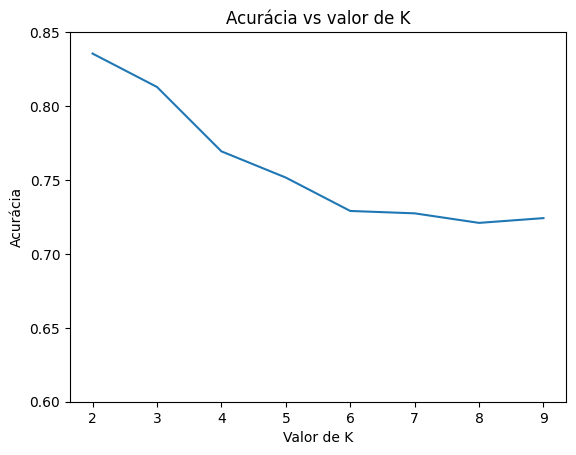

In [361]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, acc_list_train)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")
plt.ylim(0.6,0.85)
plt.title('Acurácia vs valor de K')


In [362]:
for k in conf_matrix_by_k_train:
    print(k)
    print(conf_matrix_by_k_train[k])

2
[[386   0]
 [102 132]]
3
[[333  53]
 [ 63 171]]
4
[[361  25]
 [118 116]]
5
[[321  65]
 [ 89 145]]
6
[[348  38]
 [130 104]]
7
[[321  65]
 [104 130]]
8
[[340  46]
 [127 107]]
9
[[320  66]
 [105 129]]


#### Performance com a base de teste

##### Acurácia em relação a quantidade de vizinhos

Text(0.5, 1.0, 'Acurácia vs valor de K')

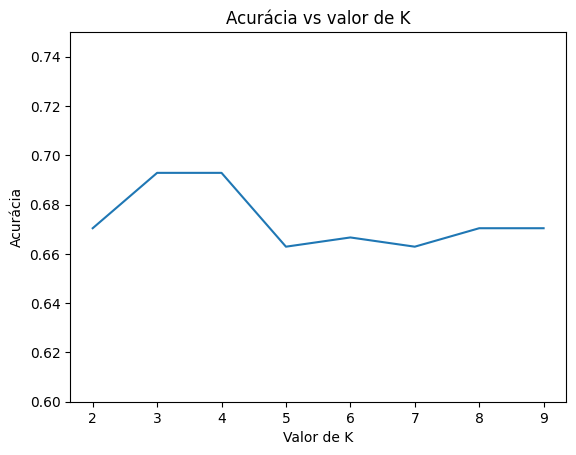

In [363]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range, acc_list_test)
plt.xlabel("Valor de K")
plt.ylabel("Acurácia")
plt.ylim(0.6,0.75)
plt.title('Acurácia vs valor de K')


In [364]:
for k in conf_matrix_by_k_test:
    print(k)
    print(conf_matrix_by_k_test[k])

2
[[145  14]
 [ 74  34]]
3
[[127  32]
 [ 50  58]]
4
[[142  17]
 [ 65  43]]
5
[[121  38]
 [ 52  56]]
6
[[131  28]
 [ 61  47]]
7
[[120  39]
 [ 51  57]]
8
[[132  27]
 [ 61  47]]
9
[[126  33]
 [ 55  53]]


### Modelo de Regressão Logística

O modelo de Regressão Logística modela o problema em uma sigmoide a distribuição dos dados, onde a sigmoide vai de valor decimal entre 0 e 1. Possívelmente ideal para esse problema, porque ou o passageiro sobreviveu ou não.

In [365]:
from sklearn.linear_model import LogisticRegression

i_range = range(100,1000)
acc_by_i_test = {}
acc_by_i_train = {}
conf_matrix_by_i_test = {}
conf_matrix_by_i_train = {}
acc_list_test = []
acc_list_train = []

for i in i_range:
    lr = LogisticRegression(max_iter=i)
    lr.fit(x_train, y_train)

    predict_train = lr.predict(x_train)
    acc_by_i_train[i] = accuracy_score(y_train, predict_train)
    conf_matrix_by_i_train[i] = confusion_matrix(y_train, predict_train)
    acc_list_train.append(acc_by_i_train[i])

    predict_test = lr.predict(x_test)
    acc_by_i_test[i] = accuracy_score(y_test, predict_test)
    conf_matrix_by_i_test[i] = confusion_matrix(y_test, predict_test)
    acc_list_test.append(acc_by_i_test[i])

#### Performance com a base de treino

##### Acurácia em relação a quantidade de iterações

Text(0.5, 1.0, 'Acurácia vs valor de iterações (I)')

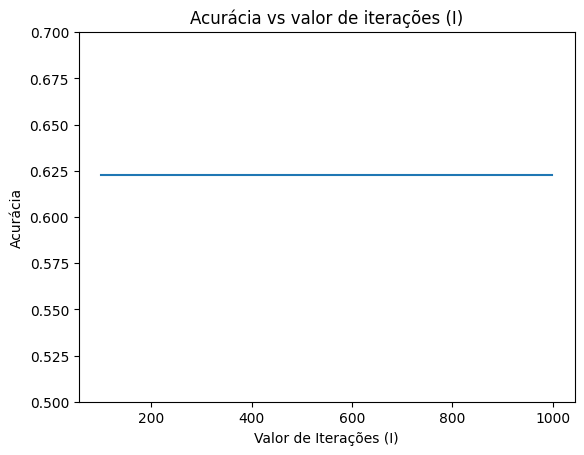

In [366]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(i_range, acc_list_train)
plt.xlabel("Valor de Iterações (I)")
plt.ylabel("Acurácia")
plt.ylim(0.5,0.7)
plt.title('Acurácia vs valor de iterações (I)')

In [367]:
for i in conf_matrix_by_i_train:
    print(i)
    print(conf_matrix_by_i_train[i])

100
[[386   0]
 [234   0]]
101
[[386   0]
 [234   0]]
102
[[386   0]
 [234   0]]
103
[[386   0]
 [234   0]]
104
[[386   0]
 [234   0]]
105
[[386   0]
 [234   0]]
106
[[386   0]
 [234   0]]
107
[[386   0]
 [234   0]]
108
[[386   0]
 [234   0]]
109
[[386   0]
 [234   0]]
110
[[386   0]
 [234   0]]
111
[[386   0]
 [234   0]]
112
[[386   0]
 [234   0]]
113
[[386   0]
 [234   0]]
114
[[386   0]
 [234   0]]
115
[[386   0]
 [234   0]]
116
[[386   0]
 [234   0]]
117
[[386   0]
 [234   0]]
118
[[386   0]
 [234   0]]
119
[[386   0]
 [234   0]]
120
[[386   0]
 [234   0]]
121
[[386   0]
 [234   0]]
122
[[386   0]
 [234   0]]
123
[[386   0]
 [234   0]]
124
[[386   0]
 [234   0]]
125
[[386   0]
 [234   0]]
126
[[386   0]
 [234   0]]
127
[[386   0]
 [234   0]]
128
[[386   0]
 [234   0]]
129
[[386   0]
 [234   0]]
130
[[386   0]
 [234   0]]
131
[[386   0]
 [234   0]]
132
[[386   0]
 [234   0]]
133
[[386   0]
 [234   0]]
134
[[386   0]
 [234   0]]
135
[[386   0]
 [234   0]]
136
[[386   0]
 [234   0]]
1

#### Performance com a base de teste

##### Acurácia em relação a quantidade de iterações

Text(0.5, 1.0, 'Acurácia vs valor de iterações (I)')

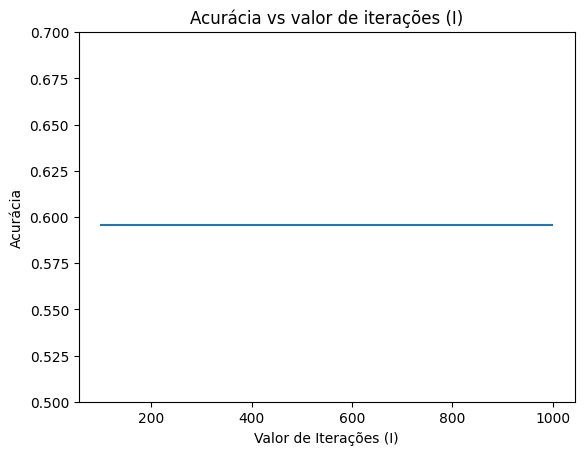

In [368]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(i_range, acc_list_test)
plt.xlabel("Valor de Iterações (I)")
plt.ylabel("Acurácia")
plt.ylim(0.5,0.7)
plt.title('Acurácia vs valor de iterações (I)')

In [369]:
for i in conf_matrix_by_i_test:
    print(i)
    print(conf_matrix_by_i_test[i])

100
[[159   0]
 [108   0]]
101
[[159   0]
 [108   0]]
102
[[159   0]
 [108   0]]
103
[[159   0]
 [108   0]]
104
[[159   0]
 [108   0]]
105
[[159   0]
 [108   0]]
106
[[159   0]
 [108   0]]
107
[[159   0]
 [108   0]]
108
[[159   0]
 [108   0]]
109
[[159   0]
 [108   0]]
110
[[159   0]
 [108   0]]
111
[[159   0]
 [108   0]]
112
[[159   0]
 [108   0]]
113
[[159   0]
 [108   0]]
114
[[159   0]
 [108   0]]
115
[[159   0]
 [108   0]]
116
[[159   0]
 [108   0]]
117
[[159   0]
 [108   0]]
118
[[159   0]
 [108   0]]
119
[[159   0]
 [108   0]]
120
[[159   0]
 [108   0]]
121
[[159   0]
 [108   0]]
122
[[159   0]
 [108   0]]
123
[[159   0]
 [108   0]]
124
[[159   0]
 [108   0]]
125
[[159   0]
 [108   0]]
126
[[159   0]
 [108   0]]
127
[[159   0]
 [108   0]]
128
[[159   0]
 [108   0]]
129
[[159   0]
 [108   0]]
130
[[159   0]
 [108   0]]
131
[[159   0]
 [108   0]]
132
[[159   0]
 [108   0]]
133
[[159   0]
 [108   0]]
134
[[159   0]
 [108   0]]
135
[[159   0]
 [108   0]]
136
[[159   0]
 [108   0]]
1

## Conclusão

O modelo de árvore de decisão conseguiu uma acurácia satisfatória (maior ou igual a 70% na base de teste), não apresentando underfit por ter uma quantidade de acertos muito maior que os erros e também não há overfit porque a precisão da base de teste não tem uma diferença maior que 5 pontos percentuais em relação a base de treino. Entretanto é notável que a medidade que a profundidade aumenta maior é o overfit dos dados.

O modelo KNN não teve uma performance satisfatória, não apresentando underfit porque manteve uma quantidade de acertos maior que os erros nas duas bases, mas sim overfit por manter uma precisão entre bases com uma diferença maior que 5 pontos percentuais. Nota-se também que a medida que o tamanho de vizinhos aumentava, diminuia o overfit do modelo

O modelo de Regressão Logística não conseguiu uma acurácia satisfatória, não há overfit pela diferença de acurácia entre bases ser menor que 5% e é possível que tenha underfit pelo modelo ter uma precisão próxima de 60%